In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patches as mpatches
import math

# width = 505.89
width = 417.68646

inputnum_arr = np.array([1,2,3,4])
blknum_arr = np.array([10,20,50,100,200,500,1000])
datasz_arr = np.array([8192,65536,524288,4194304])
datasz_labels = np.array(["8KB", "64KB", "512KB", "4MB"])

numctxt_arr = np.array([10,20,50,100,200,500,1000])
numpart_arr = np.array([10,20,50,100,200,500,1000])

In [2]:
def set_size(width, fraction=1):
    """ Set aesthetic figure dimensions to avoid scaling in latex.
    Parameters
    ----------
    width: float
            Width in pts
    fraction: float
            Fraction of the width which you wish the figure to occupy
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [13]:
def plot_kv(input_path, output_path):
    # VERIFY_KV (1 plot, bar graph, # of inputs on x-axis)
    w = 0.1
    maxw = w*3
    colors = ['darksalmon','burlywood','darkseagreen','cornflowerblue','thistle','rosybrown','silver']

    fig, ax = plt.subplots(1,1,figsize=set_size(width, fraction=1))

    input_data = pd.read_csv(input_path)
    x = np.arange(len(inputnum_arr))
    y_values = list()

    # Get latency values by block_num. lists in "values" is what we want to plot
    for blk_num in blknum_arr:
        y_values.append(input_data.loc[input_data['block_num'] == blk_num]['total'].tolist())
       
    for i in range(len(y_values)):
        ax.bar(x+(-maxw+i*w), y_values[i], w, color=colors[i])

    plt.xticks(x,inputnum_arr, fontsize=12)
    
    glob_max = max(y_values[-1])
    step_size = 1.
    new_yts = np.arange(0, glob_max+step_size, step_size)
#     new_yts = np.arange(0, glob_max, step_size)
    plt.yticks(new_yts, new_yts, fontsize=12)    

    plt.xlabel("Number of dependencies", fontsize=12)
    plt.ylabel("Latency (s)", fontsize=12)
    
    plt.legend(blknum_arr.astype(str), title_fontsize=12, fontsize=12, title="Number of blocks", ncol=1, bbox_to_anchor=(0.99,0.9))
    plt.grid(linestyle='--', color='silver', axis='y', linewidth=0.5)
    plt.savefig(output_path, bbox_inches='tight', format='pdf')

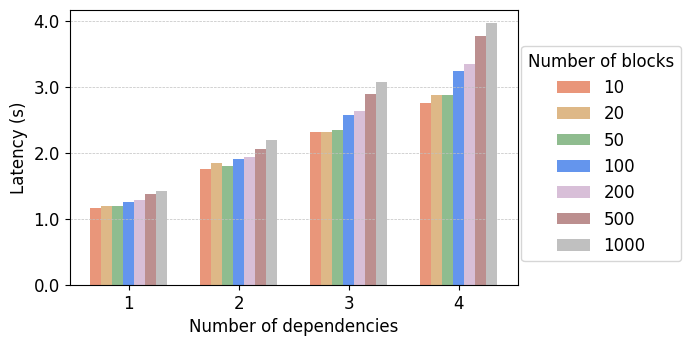

In [14]:
v_kv_path = "./data/kv.csv"
plot_kv(v_kv_path, "./plots/kv.pdf")

In [ ]:
# def plot_kv_subplot(input_path, output_path, isLocal, isLog):
#     fig, axs = plt.subplots(2,2,figsize=set_size(width*1.2, fraction=1))
#     colors = ['coral','mediumseagreen', 'dodgerblue', 'darkorchid']

#     input_data = pd.read_csv(input_path)
#     y_values = list()

#     for input_num in inputnum_arr:
#         y_values.append(input_data.loc[input_data['input_num'] == input_num]['total'].tolist())

#     print(y_values)
        
#     if isLog:
#         x = blknum_arr
#         bar_w = 0.2 * np.array(x)
#     else:
#         x = np.arange(len(blknum_arr))
#         bar_w = 0.3
        
#     axs[0,0].bar(x,y_values[0],bar_w,color=colors[0])
#     axs[0,0].set_title("Number of dependencies = 1", fontsize=12)
#     axs[0,1].bar(x,y_values[1],bar_w,color=colors[1])
#     axs[0,1].set_title("Number of dependencies = 2", fontsize=12)
#     axs[1,0].bar(x,y_values[2],bar_w,color=colors[2])
#     axs[1,0].set_title("Number of dependencies = 3", fontsize=12)
#     axs[1,1].bar(x,y_values[3],bar_w,color=colors[3])
#     axs[1,1].set_title("Number of dependencies = 4", fontsize=12)

#     for ax in axs.flat:
#         if isLog:
#             ax.set_xscale('log')
#         ax.set_xticks(x, blknum_arr, fontsize=12)
#         ax.set_xlabel("Number of blocks", fontsize=12)
#         ax.set_ylabel('Latency (s)', fontsize=12)
#         ax.label_outer()
    
#     if isLocal:
#         axs[0,0].sharey(axs[0,1])
#         yts = axs[1,1].get_yticks()
#         yts = yts.astype(np.double)
#         new_yts = np.arange(min(yts), max(yts), 0.1)
#         axs[1,1].set_yticks(new_yts, new_yts, fontsize=10)
#         axs[1,0].set_yticks(new_yts, new_yts, fontsize=10)
#         axs[1,0].sharey(axs[1,1])
#         axs[1,0].set_ylim(0,0.61)
#         plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))
#     else:
#         yts = axs[0,1].get_yticks()
#         yts = yts.astype(np.double)
#         new_yts = np.arange(min(yts), math.ceil(max(yts))+0.5, 0.5)
#         axs[0,1].set_yticks(new_yts, new_yts, fontsize=12)
#         axs[0,0].sharey(axs[0,1])
#         axs[0,0].set_yticks(new_yts, new_yts, fontsize=12)

#         yts = axs[1,1].get_yticks()
#         yts = yts.astype(np.double)
#         new_yts = np.arange(min(yts), max(yts), 0.5)
#         print(new_yts)
#         axs[1,1].set_yticks(new_yts, new_yts, fontsize=12)
#         axs[1,0].set_yticks(new_yts, new_yts, fontsize=12)
#         axs[1,0].sharey(axs[1,1])

#     for ax in axs.flat:
#         ax.grid(linestyle='--', color='darkgrey', axis='y', linewidth=0.4)

#     plt.savefig(output_path, bbox_inches='tight', format='pdf')

In [ ]:
# v_kv_path = "./data/kv.csv"

# plot_kv_subplot(v_kv_path, "./plots/kv_sub.pdf", False, False)
# plot_kv_subplot(v_kv_path, "./plots/kv_sub_log.pdf", False, True)

In [17]:
def plot_opc(input_path, output_path, isLog):
    w = 0.1
    colors = ['darksalmon','burlywood','darkseagreen','cornflowerblue']

    fig, ax = plt.subplots(1,1,figsize=set_size(width, fraction=1))

    input_data = pd.read_csv(input_path)
    y_values = list()
    
    if isLog:
        x = np.array([8,64,512,4096])
        for inp in inputnum_arr:
            y_values.append(input_data.loc[input_data['input_num'] == inp]['total'].tolist())
        for i in range(len(y_values)):
            ax.plot(x, y_values[i], marker="o", color=colors[i])
        plt.xscale('log')
        plt.yscale('log')
        plt.xticks(x, x, fontsize=12)
        plt.xlabel("Data size (KB)", fontsize=12)
#         plt.legend(inputnum_arr.astype(str), fontsize=12, title="Number of dependencies", title_fontsize=12, ncol=2, bbox_to_anchor=(1,0.65))
        plt.legend(inputnum_arr.astype(str), fontsize=12, title="Number of dependencies", title_fontsize=12, ncol=4, loc="upper left")      
        new_yts = [0.1,1,10,100]
        plt.yticks(new_yts, new_yts, fontsize=12)
        plt.ylim((0.1,40))

    print(y_values)
    
    plt.ylabel("Latency (s)", fontsize=12)
    plt.grid(linestyle='--', color='silver', axis='y', linewidth=0.4)
    plt.savefig(output_path, bbox_inches='tight', format='pdf')

[[0.526016, 0.678414, 1.894741, 8.130242], [0.563835, 0.680048, 2.809372, 15.748383], [0.598573, 1.077437, 3.648562, 20.83905], [0.652415, 1.243809, 4.476012, 27.985078]]


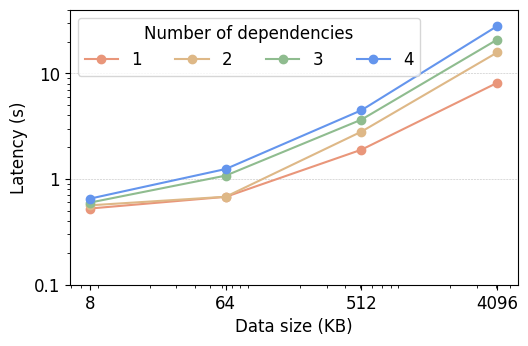

In [18]:
v_opc_path = "./data/opc.csv"

plot_opc(v_opc_path, "./plots/opc_log.pdf", True)
# plot_opc(v_opc_path, "./plots/opc.pdf", False)

In [3]:
def plot_sign(input_path, output_path, isLog):
    w = 0.1
    colors = ['darksalmon','burlywood','darkseagreen','cornflowerblue']

    fig, ax = plt.subplots(1,1,figsize=set_size(width, fraction=1))

    input_data = pd.read_csv(input_path)
    x = np.arange(len(datasz_arr))
    y_values = list()

    if isLog:
        x = np.array([8,64,512,4096])
        for inp in inputnum_arr:
            y_values.append(input_data.loc[input_data['output_num'] == inp]['total'].tolist())
        for i in range(len(y_values)):
            ax.plot(x, y_values[i], marker="o", color=colors[i])
        plt.xscale('log')
        plt.yscale('log')
        plt.xticks(x, x, fontsize=12)
        plt.xlabel("Data size (KB)", fontsize=12)
        plt.legend(inputnum_arr.astype(str), fontsize=12, title="Number of output receipts", title_fontsize=12, ncol=4, loc="upper left")       
        new_yts = [0.1,1,10,100]
        plt.yticks(new_yts, new_yts, fontsize=12)
    else:
        x = np.arange(len(datasz_arr))
        for ds in datasz_arr:
            y_values.append(input_data.loc[input_data['data_size'] == ds]['total'].tolist())
        for i in range(len(y_values)):
            ax.plot(x, y_values[i], marker="o", color=colors[i])

        plt.xticks(x, inputnum_arr, fontsize=12)
        plt.xlabel("Number of outputs", fontsize=12)
        plt.legend(datasz_labels.astype(str), fontsize=12, title="Data size", title_fontsize=12, ncol=1, bbox_to_anchor=(1.25,0.75))
        yts = ax.get_yticks().astype(np.int64)
        plt.yticks(yts, yts, fontsize=12)
        plt.ylim([0, yts[-1]])

    
    print(y_values)

    
    plt.ylabel("Latency (s)", fontsize=12)
    plt.grid(linestyle='--', color='silver', axis='y', linewidth=0.4)
    plt.savefig(output_path, bbox_inches='tight', format='pdf')

[[0.433133, 0.515948, 1.769432, 8.092679], [0.449337, 0.588847, 2.822948, 15.796021], [0.467724, 0.918063, 3.850501, 20.506152], [0.483238, 1.100641, 4.711367, 27.809949]]


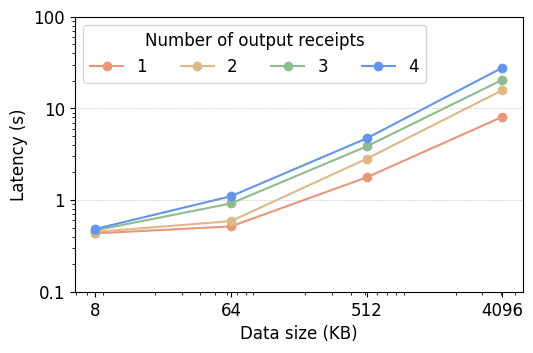

In [4]:
sign_path = "./data/sign.csv"

plot_sign(sign_path, "./plots/sign_log.pdf", True)
# plot_sign(sign_path, "./plots/sign.pdf", False)

In [20]:
def plot_dfu_mb(reg_path, dfu_path, output_path, isLog):
    fig, ax = plt.subplots()
    
    reg_data = pd.read_csv(reg_path)
    dfu_data = pd.read_csv(dfu_path)

    x = numctxt_arr
    reg_values = reg_data['total'].tolist()
    dfu_values = dfu_data['total'].tolist()
    
    print(reg_values)
    print(dfu_values)
    
    ax.plot(x, dfu_values, marker="o", color='palevioletred', label='Protean')
    ax.plot(x, reg_values, marker="o", color='royalblue', label='Standard')

    plt.xscale('log')
    plt.xticks(x, numctxt_arr, fontsize=12)

    if isLog:
        plt.yscale('log')
        if "shuf" in reg_path:
            new_yts = [1,10,100]
        else:
            new_yts = [0.1,1,10,100]
        plt.yticks(new_yts, new_yts, fontsize=12)
    else:
        yts = ax.get_yticks().astype(np.int64)
        if "shuf" in reg_path:
            new_yts = np.arange(0, max(yts)+1, 10)
        else:
            new_yts = np.arange(0, max(yts)+1, 5)
        plt.yticks(new_yts, new_yts, fontsize=12)
    
    plt.xlabel("Number of ciphertexts", fontsize=12)
    plt.ylabel("Latency (s)", fontsize=12)
#     plt.legend(fontsize=12,ncol=1,bbox_to_anchor=(1.3,0.6))
    plt.legend(fontsize=12,ncol=1,loc="upper left")
    plt.grid(linestyle='--', color='silver', axis='y', linewidth=0.4)
    
    if "shuf" in reg_path:
        plt.title("Neff shuffle protocol")
    else:
        plt.title("Threshold decryption protocol", fontsize=12)
    
    plt.savefig(output_path, bbox_inches='tight', format='pdf')

In [21]:
# plot_dfu_mb('./data/shuf_reg.csv', './data/shuf_dfu.csv', './plots/shuf.pdf', False)
# plot_dfu_mb('./data/dec_reg.csv', './data/dec_dfu.csv', './plots/dec.pdf', False)

[1.843312, 2.063163, 3.162413, 4.599931, 9.00844, 18.065752, 27.446086]
[3.240967, 4.314327, 6.99384, 10.595497, 18.996431, 38.948967, 66.623969]
[0.68526, 0.860449, 1.339158, 2.400512, 4.26534, 9.221328, 15.450465]
[1.705599, 2.061444, 3.423884, 5.621205, 9.349851, 18.608638, 32.677413]


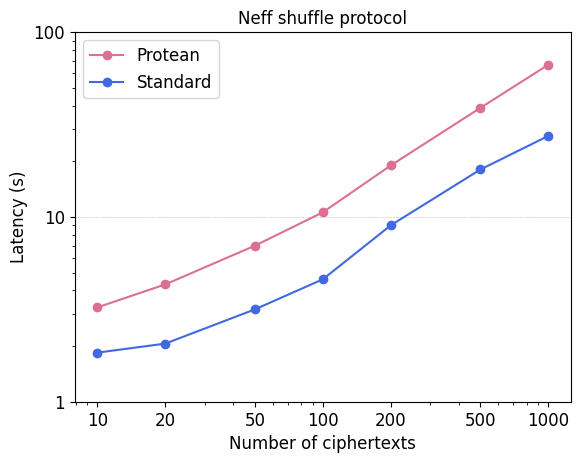

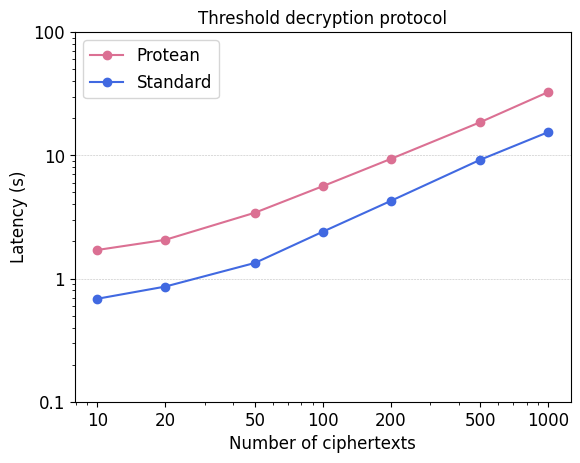

In [22]:
plot_dfu_mb('./data/shuf_reg.csv', './data/shuf_dfu.csv', './plots/shuf_log.pdf', True)
plot_dfu_mb('./data/dec_reg.csv', './data/dec_dfu.csv', './plots/dec_log.pdf', True)

In [8]:
def plot_txn(input_path, app_type, txn_type, step_size, isBatch, isMulti):
    fig, ax = plt.subplots()

    input_data = pd.read_csv(input_path)
    x = numpart_arr
    if isMulti:
        y = input_data['avg'].tolist()
    else:
        y = input_data['total'].tolist()
        
    print(y)

    ax.plot(x, y, marker="o", color='mediumblue')

    glob_min = math.floor(min(y))
    glob_max = math.ceil(max(y))
    
    plt.xscale('log')
    plt.xticks(x, numpart_arr, fontsize=12)
    
    glob_min = 0
    new_yts = np.arange(glob_min, glob_max+step_size, step_size)
#     new_yts = np.arange(glob_min, glob_max+1, 1)
#     new_yts = np.arange(0,glob_max+5,5)
    plt.yticks(new_yts, new_yts, fontsize=12)

    plt.xlabel("Number of participants", fontsize=12)
    plt.ylabel('Latency (s)', fontsize=12)
        
#     plt.title(f'{app_type} {txn_type} txn')
    plt.title(f'{txn_type} transaction')
    plt.grid(linestyle='--', color='darkgrey', axis='y', linewidth=0.4)    
    if isBatch:
        output_path = os.path.join(os.getcwd(), "plots", f'{app_type.lower()}', f'{app_type.lower()}_{txn_type}_batch.pdf')
    else:
        if isMulti:
            output_path = os.path.join(os.getcwd(), "plots", f'{app_type.lower()}', f'{app_type.lower()}_{txn_type}_multi.pdf')        
        else:
            output_path = os.path.join(os.getcwd(), "plots", f'{app_type.lower()}', f'{app_type.lower()}_{txn_type}.pdf')        
    plt.savefig(output_path, bbox_inches='tight', format='pdf')

In [ ]:
input_paths = ['./data/randlottery/close.csv', './data/randlottery/finalize.csv']

plot_txn(input_paths[0], 'RandLottery', 'close', 5, False, False)
plot_txn(input_paths[1], 'RandLottery', 'finalize', 5, False, False)

[9.310527, 9.160797, 9.085783, 9.606685, 8.870080999999999, 10.53426, 9.9828]
[9.497307, 10.214043, 9.541361, 9.048211, 10.005175, 10.679014, 11.039173]


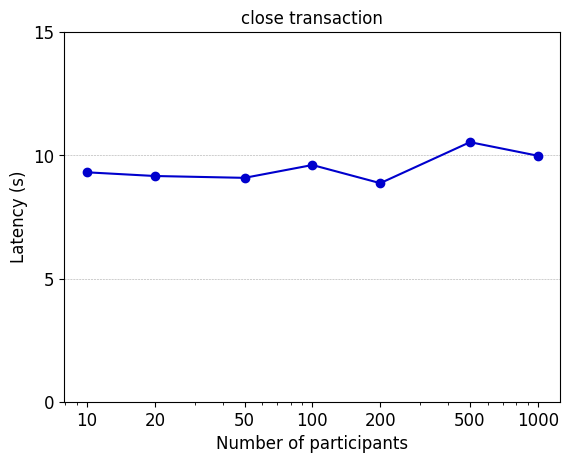

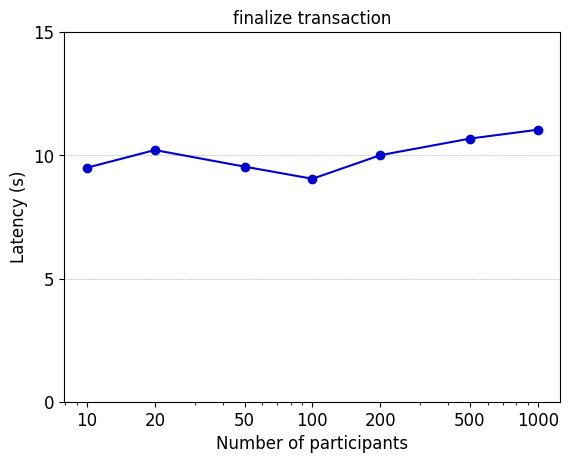

In [10]:
input_paths = ['./data/randlottery/close_batch.csv', './data/randlottery/finalize_batch.csv']

plot_txn(input_paths[0], 'RandLottery', 'close', 5, True, False)
plot_txn(input_paths[1], 'RandLottery', 'finalize', 5, True, False)

[8.9781287, 9.1769019, 9.2539591, 9.8715015, 9.7675682, 10.5692178, 12.0411677]
[9.8311193, 9.4858286, 10.8543624, 12.3328834, 12.2625801, 13.071907200000002, 15.7317532]


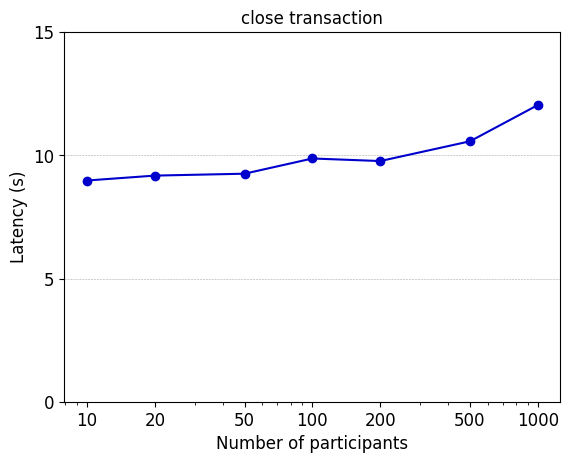

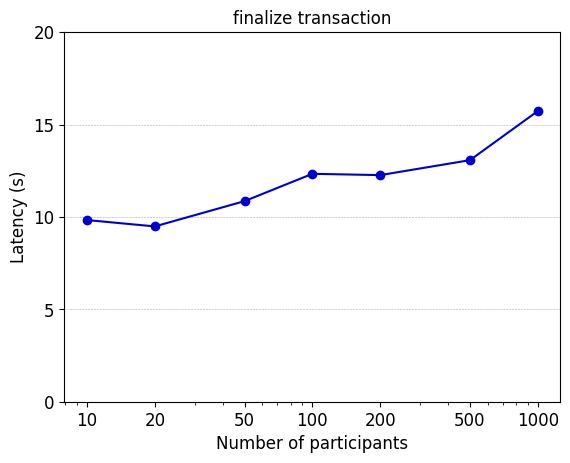

In [11]:
input_paths = ['./data/randlottery/close_multi.csv', './data/randlottery/finalize_multi.csv']

plot_txn(input_paths[0], 'RandLottery', 'close', 5, False, True)
plot_txn(input_paths[1], 'RandLottery', 'finalize', 5, False, True)

In [ ]:
input_paths = ['./data/dkglottery/setup.csv', './data/dkglottery/close.csv', './data/dkglottery/finalize.csv']

plot_txn(input_paths[0], 'DKGLottery', 'setup', 5, False, False)
plot_txn(input_paths[1], 'DKGLottery', 'close', 5, False, False)
plot_txn(input_paths[2], 'DKGLottery', 'finalize', 10, False, False)

[11.920477, 11.850081, 11.868865, 12.531066, 11.907906999999998, 12.460591, 11.79067]
[9.378264, 9.217633, 9.090487, 9.197752, 9.274427, 9.93387, 10.236429]
[12.440928, 13.486311999999998, 14.532749, 17.705371, 21.104591000000003, 30.548482, 46.799239]


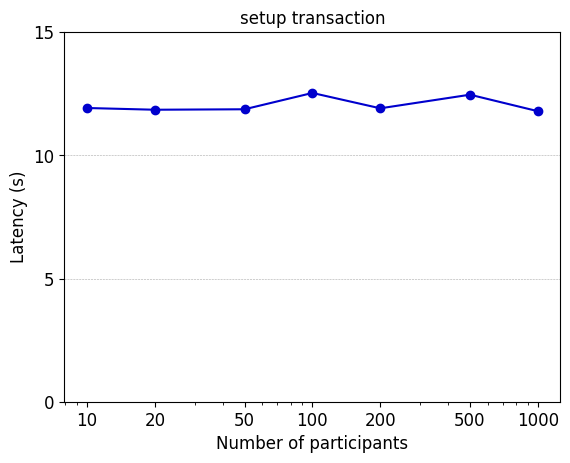

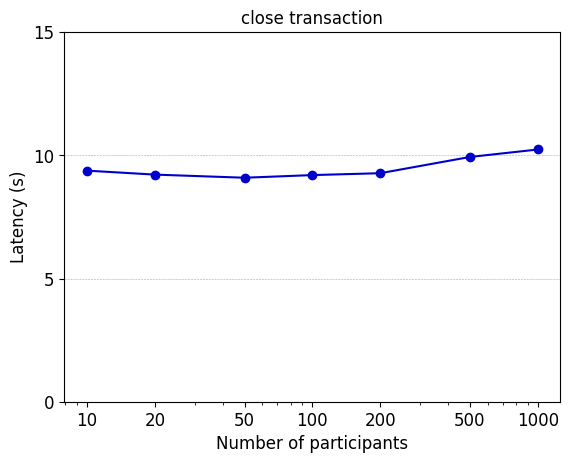

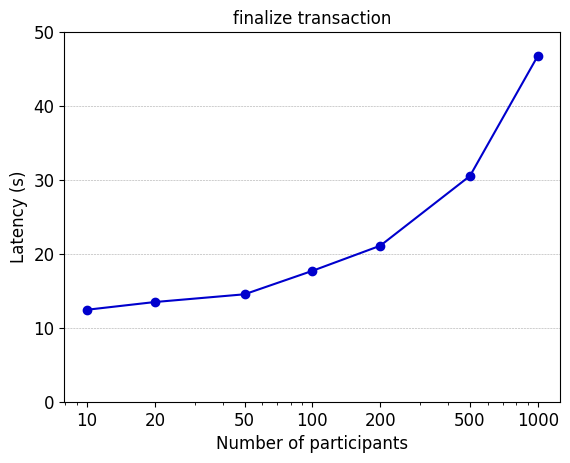

In [12]:
input_paths = ['./data/dkglottery/setup_batch.csv', './data/dkglottery/close_batch.csv', './data/dkglottery/finalize_batch.csv']

plot_txn(input_paths[0], 'DKGLottery', 'setup', 5, True, False)
plot_txn(input_paths[1], 'DKGLottery', 'close', 5, True, False)
plot_txn(input_paths[2], 'DKGLottery', 'finalize', 10, True, False)

[11.6048465, 11.9665967, 11.9699042, 11.5240721, 11.9184218, 11.5086465, 11.491406800000002]
[8.8842839, 9.0327733, 9.1460318, 9.1482435, 8.6935302, 10.3550607, 13.5188935]
[13.0488514, 13.1132936, 15.2816065, 18.708765000000003, 21.154291, 33.58291989999999, 51.404127800000005]


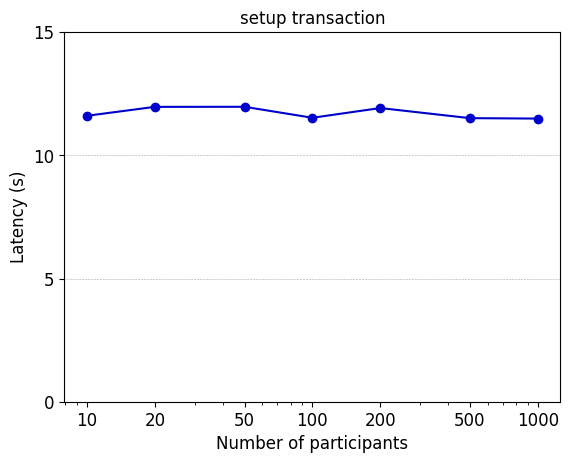

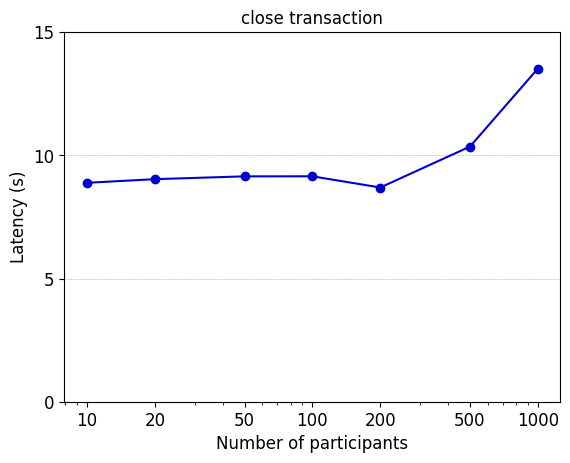

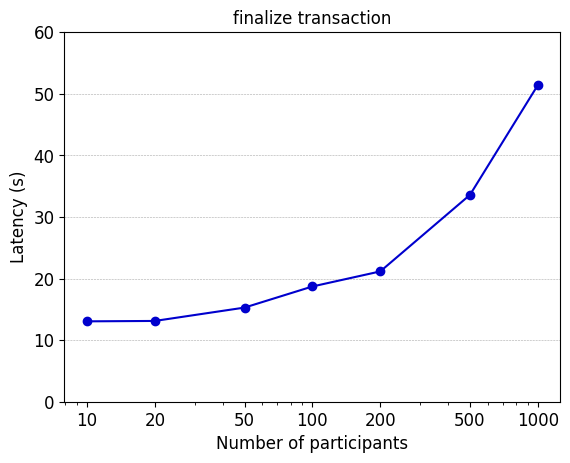

In [13]:
input_paths = ['./data/dkglottery/setup_multi.csv', './data/dkglottery/close_multi.csv', './data/dkglottery/finalize_multi.csv']

plot_txn(input_paths[0], 'DKGLottery', 'setup', 5, False, True)
plot_txn(input_paths[1], 'DKGLottery', 'close', 5, False, True)
plot_txn(input_paths[2], 'DKGLottery', 'finalize', 10, False, True)

In [ ]:
input_paths = ['./data/evoting/setup.csv', './data/evoting/lock.csv', './data/evoting/shuffle.csv', './data/evoting/tally.csv']

plot_txn(input_paths[0], 'EVoting', 'setup', 5, False, False)
plot_txn(input_paths[1], 'EVoting', 'lock', 5, False, False)
plot_txn(input_paths[2], 'EVoting', 'shuffle', 10, False, False)
plot_txn(input_paths[3], 'EVoting', 'tally', 10, False, False)

[12.57771, 11.982512, 12.392673, 13.227852, 12.313415, 11.548341, 12.464879]
[9.488156, 9.015593, 8.980851999999999, 9.198633, 9.005016999999999, 9.776945, 10.814596000000002]
[17.690995, 18.682093, 25.135752, 31.133067, 42.481836, 71.90853899999999, 111.781591]
[13.400289, 14.565022, 16.901947, 20.554067, 27.635069000000005, 46.814946000000006, 81.12158500000001]


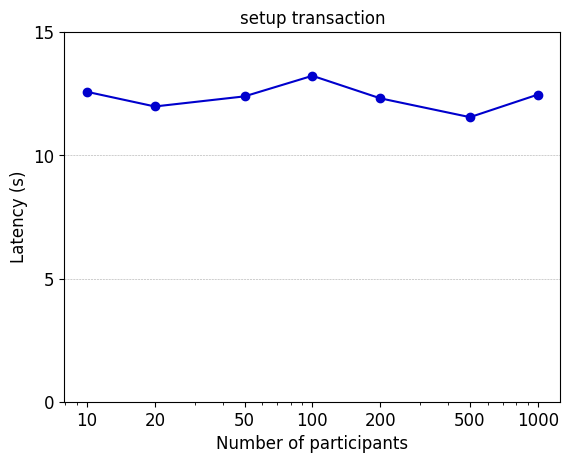

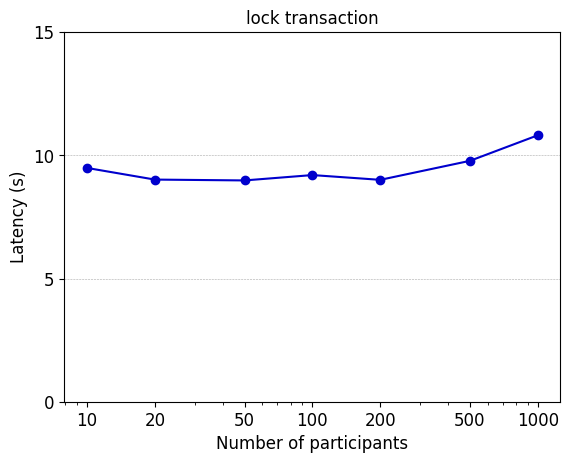

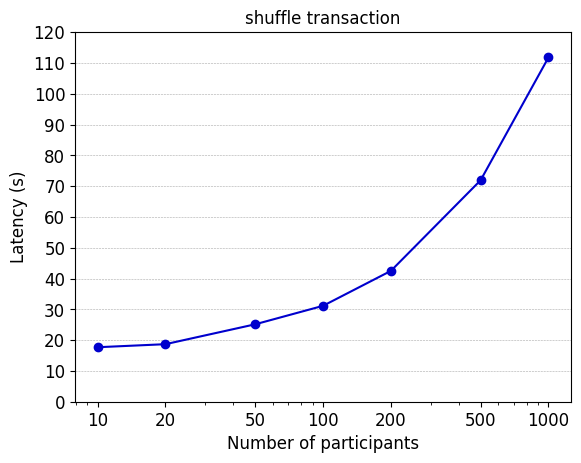

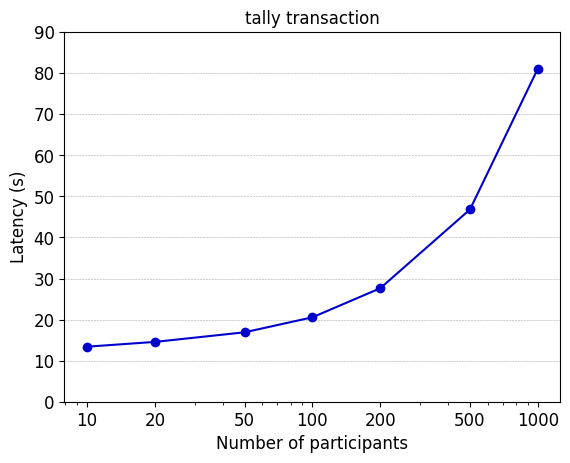

In [14]:
input_paths = ['./data/evoting/setup_batch.csv', './data/evoting/lock_batch.csv', './data/evoting/shuffle_batch.csv', './data/evoting/tally_batch.csv']

plot_txn(input_paths[0], 'EVoting', 'setup', 5, True, False)
plot_txn(input_paths[1], 'EVoting', 'lock', 5, True, False)
plot_txn(input_paths[2], 'EVoting', 'shuffle', 10, True, False)
plot_txn(input_paths[3], 'EVoting', 'tally', 10, True, False)

[13.3268909, 14.005516, 11.476074, 13.8910119, 13.5189962, 10.271797, 15.1276187]
[9.7446963, 9.262622, 9.1298786, 9.7446318, 9.6737992, 10.3175328, 12.6974448]
[18.0204671, 19.2405393, 26.7531879, 38.2951623, 52.2344981, 79.29083490000001, 121.60962579999998]
[13.6621056, 15.1884447, 17.4130695, 21.7943822, 28.601889000000007, 47.3387109, 81.88665710000001]


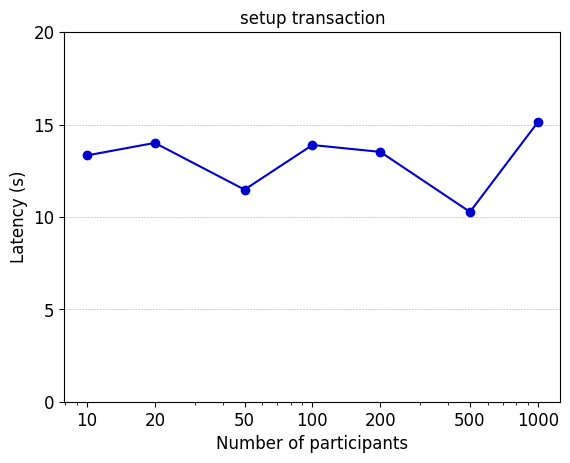

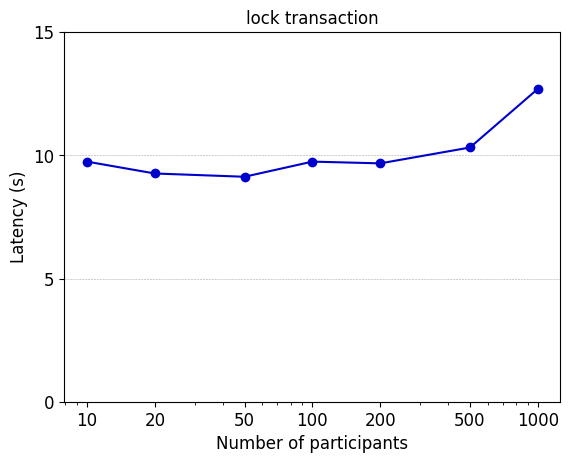

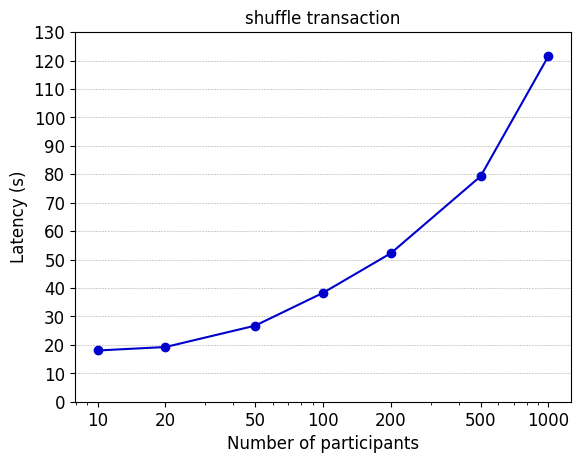

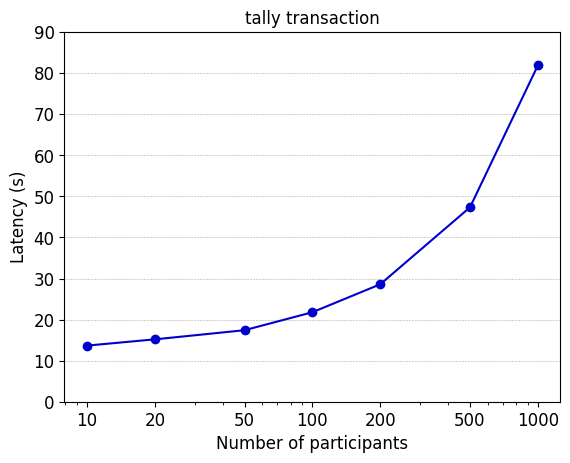

In [15]:
input_paths = ['./data/evoting/setup_multi.csv', './data/evoting/lock_multi.csv', './data/evoting/shuffle_multi.csv', './data/evoting/tally_multi.csv']

plot_txn(input_paths[0], 'EVoting', 'setup', 5, False, True)
plot_txn(input_paths[1], 'EVoting', 'lock', 5, False, True)
plot_txn(input_paths[2], 'EVoting', 'shuffle', 10, False, True)
plot_txn(input_paths[3], 'EVoting', 'tally', 10, False, True)

In [ ]:
# def plot_jv_bar(input_path, output_path, app_type, txn_type, step_size, isBatch):
#     fig, ax = plt.subplots()
    
#     input_data = pd.read_csv(input_path)
#     y_avgs = input_data['avg'].tolist()
#     y_mins = input_data['min'].tolist()
#     y_maxs = input_data['max'].tolist()
#     y_stds = input_data['std'].tolist()

#     xs = np.arange(len(numpart_arr))
    
#     ax.bar(xs, y_avgs, width=0.3, color='sandybrown')
#     ax.errorbar(xs, y_avgs, y_stds, solid_capstyle='projecting', fmt=' ', capsize=4, color='black')
# #     ax.bar(xs, y_avgs, yerr=y_std, width=0.3, color='sandybrown')

#     idx = 0
#     for p in ax.patches:
#         x = p.get_x()  # get the bottom left x corner of the bar
#         w = p.get_width()  # get width of bar
#         min_y = y_mins[idx]  # use h to get min from dict z
#         max_y = y_maxs[idx]  # use h to get max from dict z
#         plt.vlines(x+w/2, min_y, max_y, color='black')  # draw a vertical line
#         idx+=1

#     glob_max = math.ceil(max(y_maxs))
#     new_yts = np.arange(0, glob_max+step_size, step_size)

#     plt.xticks(xs, numpart_arr, fontsize=12)
#     plt.yticks(new_yts, new_yts, fontsize=12)

#     plt.xlabel("Number of participants", fontsize=12)
#     plt.ylabel('Latency (s)', fontsize=12)
        
#     plt.title(f'{app_type} {txn_type} txn')
#     plt.grid(linestyle='--', color='darkgrey', axis='y', linewidth=0.4)
#     if isBatch:
#         output_path = os.path.join(os.getcwd(), "plots", f'{app_type.lower()}', f'{app_type.lower()}_{txn_type}_batch_bar.pdf')
#     else:
#         output_path = os.path.join(os.getcwd(), "plots", f'{app_type.lower()}', f'{app_type.lower()}_{txn_type}_bar.pdf')
#     plt.savefig(output_path, bbox_inches='tight', format='pdf')

In [ ]:
# plot_jv_bar('./data/dkglottery/join.csv', '', 'DKGLottery', 'join', 5, False)
# plot_jv_bar('./data/randlottery/join.csv', '', 'RandLottery', 'join', 5, False)
# plot_jv_bar('./data/evoting/vote.csv', '', 'EVoting', 'vote', 5, False)

In [ ]:
# plot_jv_bar('./data/dkglottery/join_batch.csv', '', 'DKGLottery', 'join', 5, True)
# plot_jv_bar('./data/randlottery/join_batch.csv', '', 'RandLottery', 'join', 5, True)
# plot_jv_bar('./data/evoting/vote_batch.csv', '', 'EVoting', 'vote', 5, True)

In [16]:
import matplotlib.patches as mpatches

def plot_jv_line(input_path, output_path, app_type, txn_type, step_size, isBatch, isMulti):

    fig, ax = plt.subplots()
    
    input_data = pd.read_csv(input_path)
    y_avgs = input_data['avg'].tolist()
    y_mins = input_data['min'].tolist()
    y_maxs = input_data['max'].tolist()
    y_stds = input_data['std'].tolist()
    
    plt.xscale('log')
    xs = numpart_arr

    yerr0 = np.array(y_avgs) - np.array(y_stds)
    yerr1 = np.array(y_avgs) + np.array(y_stds)
    
    ax.plot(xs, y_avgs, marker='o', color='purple')
    ax.fill_between(xs, y_mins, y_maxs, alpha=0.4, color='thistle')
    ax.fill_between(xs, yerr0, yerr1, alpha=0.7, color='thistle')

    p1 = mpatches.Patch(facecolor='thistle', alpha=0.7, label='stddev')
    p2 = mpatches.Patch(facecolor='thistle', alpha=0.4, label='min/max')
    
    glob_max = math.ceil(max(y_maxs))
    new_yts = np.arange(0, glob_max+step_size, step_size)

    plt.xticks(xs, numpart_arr, fontsize=12)
    plt.yticks(new_yts, new_yts, fontsize=12)

    plt.xlabel("Number of participants", fontsize=12)
    plt.ylabel('Latency (s)', fontsize=12)
    
    plt.legend(handles=[p1,p2], fontsize=12, loc='upper left')
        
#     plt.title(f'{app_type} {txn_type} txn')
    plt.title(f'{txn_type} transaction')
    plt.grid(linestyle='--', color='darkgrey', axis='y', linewidth=0.4)
    if isBatch:
        output_path = os.path.join(os.getcwd(), "plots", f'{app_type.lower()}', f'{app_type.lower()}_{txn_type}_batch_line.pdf')
    else:
        if isMulti:
            output_path = os.path.join(os.getcwd(), "plots", f'{app_type.lower()}', f'{app_type.lower()}_{txn_type}_multi_line.pdf')
        else:
            output_path = os.path.join(os.getcwd(), "plots", f'{app_type.lower()}', f'{app_type.lower()}_{txn_type}_line.pdf')
    plt.savefig(output_path, bbox_inches='tight', format='pdf')

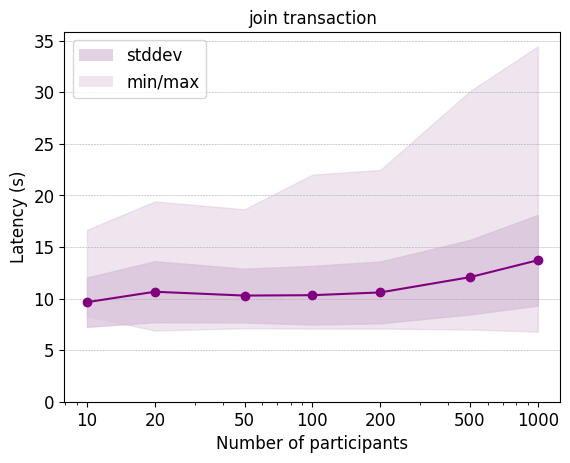

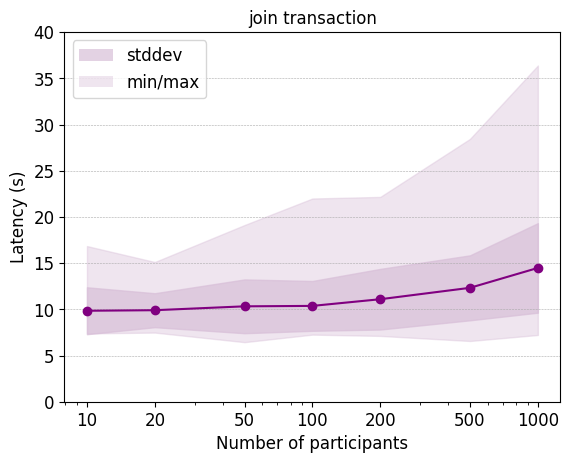

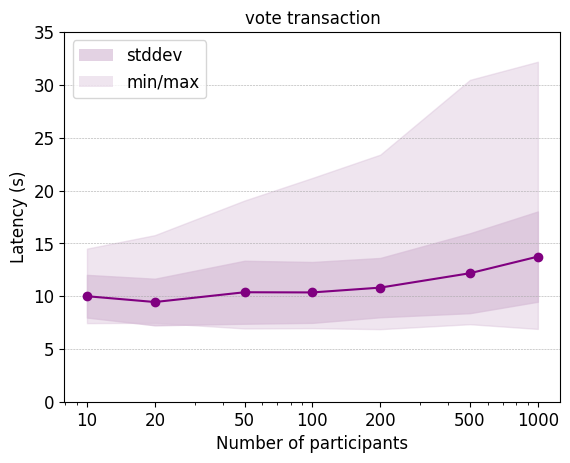

In [17]:
plot_jv_line('./data/dkglottery/join.csv', '', 'DKGLottery', 'join', 5, False, False)
plot_jv_line('./data/randlottery/join.csv', '', 'RandLottery', 'join', 5, False, False)
plot_jv_line('./data/evoting/vote.csv', '', 'EVoting', 'vote', 5, False, False)

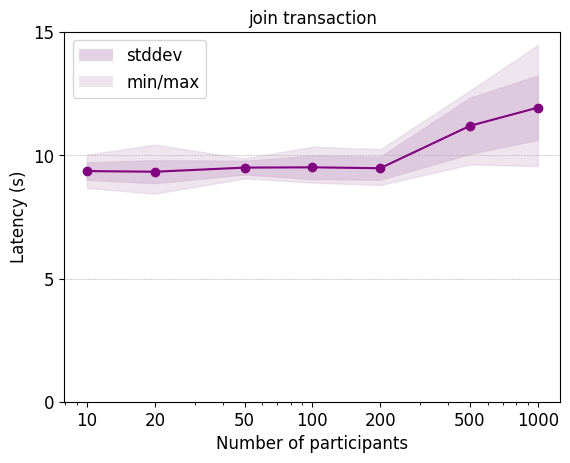

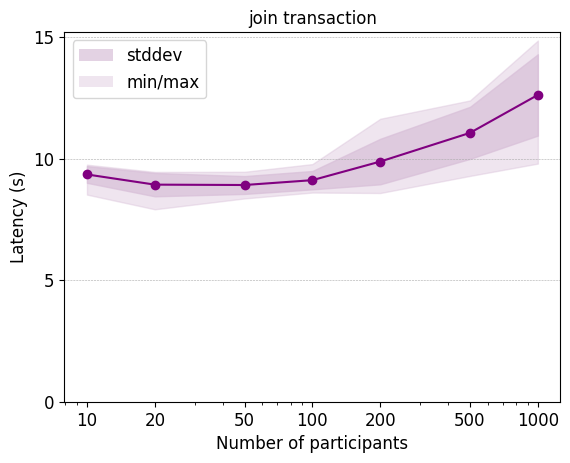

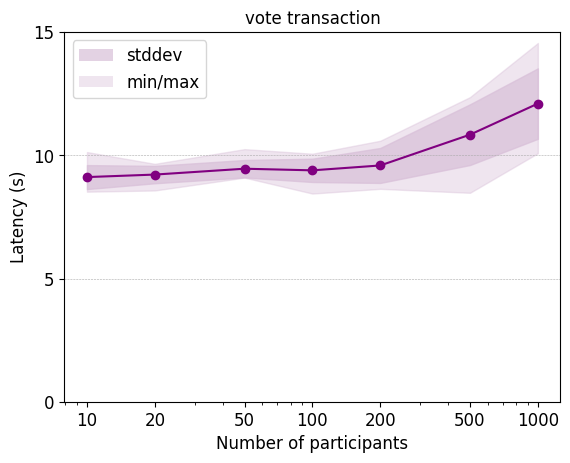

In [18]:
plot_jv_line('./data/dkglottery/join_batch.csv', '', 'DKGLottery', 'join', 5, True, False)
plot_jv_line('./data/randlottery/join_batch.csv', '', 'RandLottery', 'join', 5, True, False)
plot_jv_line('./data/evoting/vote_batch.csv', '', 'EVoting', 'vote', 5, True, False)

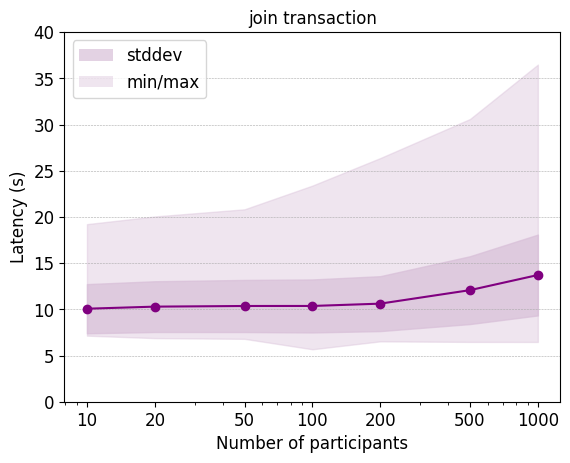

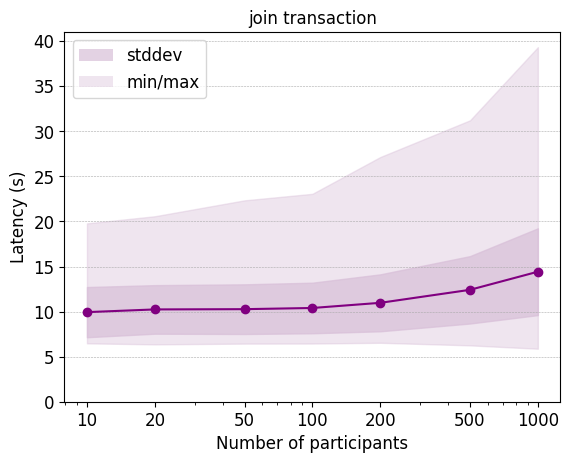

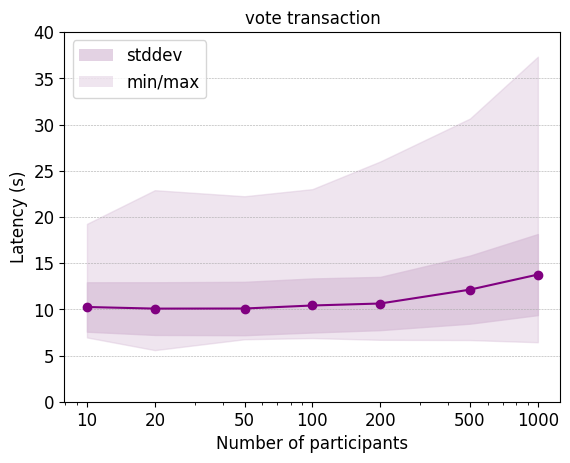

In [19]:
plot_jv_line('./data/dkglottery/join_multi.csv', '', 'DKGLottery', 'join', 5, False, True)
plot_jv_line('./data/randlottery/join_multi.csv', '', 'RandLottery', 'join', 5, False, True)
plot_jv_line('./data/evoting/vote_multi.csv', '', 'EVoting', 'vote', 5, False, True)